In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Applied to axon validation data for sample MS29, all samples except 2334

<AxesSubplot:xlabel='Labeling Type', ylabel='Labeling Time (s)'>

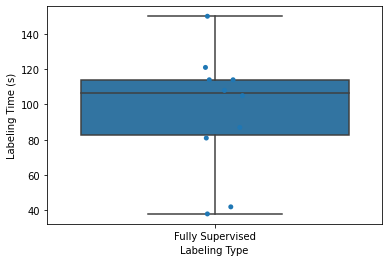

In [2]:
labeling_times = [114, 108, 38, 114, 105, 150, 81, 87, 121, 42]
labeling_types = ["Fully Supervised" for i in labeling_times]


data = {"Labeling Time (s)" : labeling_times, "Labeling Type": labeling_types}
df = pd.DataFrame(data=data)

sns.stripplot(x="Labeling Type", y="Labeling Time (s)", data=df)
sns.boxplot(x="Labeling Type", y="Labeling Time (s)", data=df)

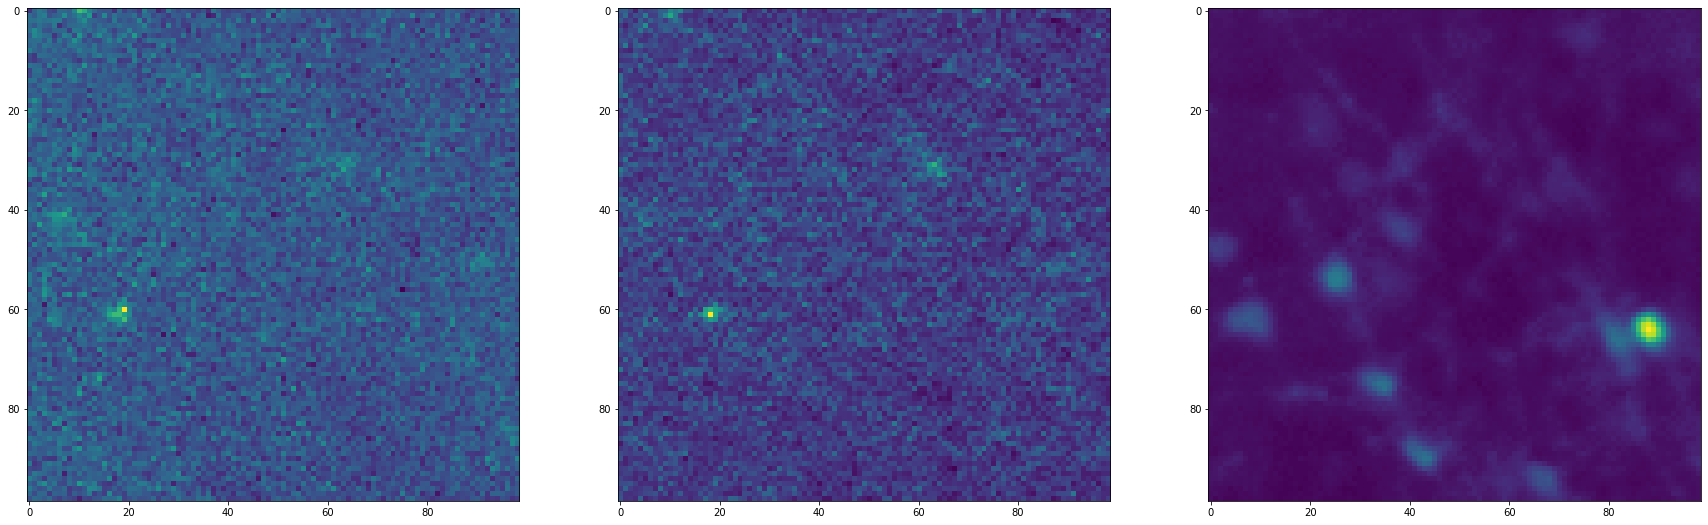

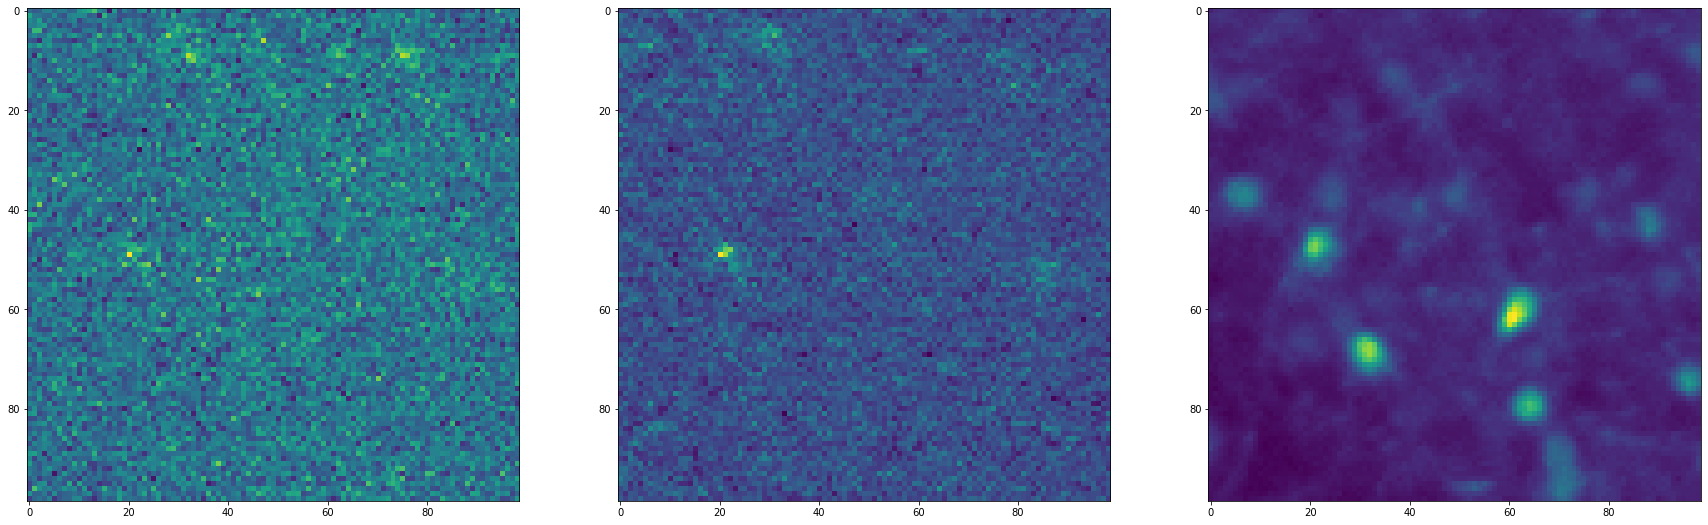

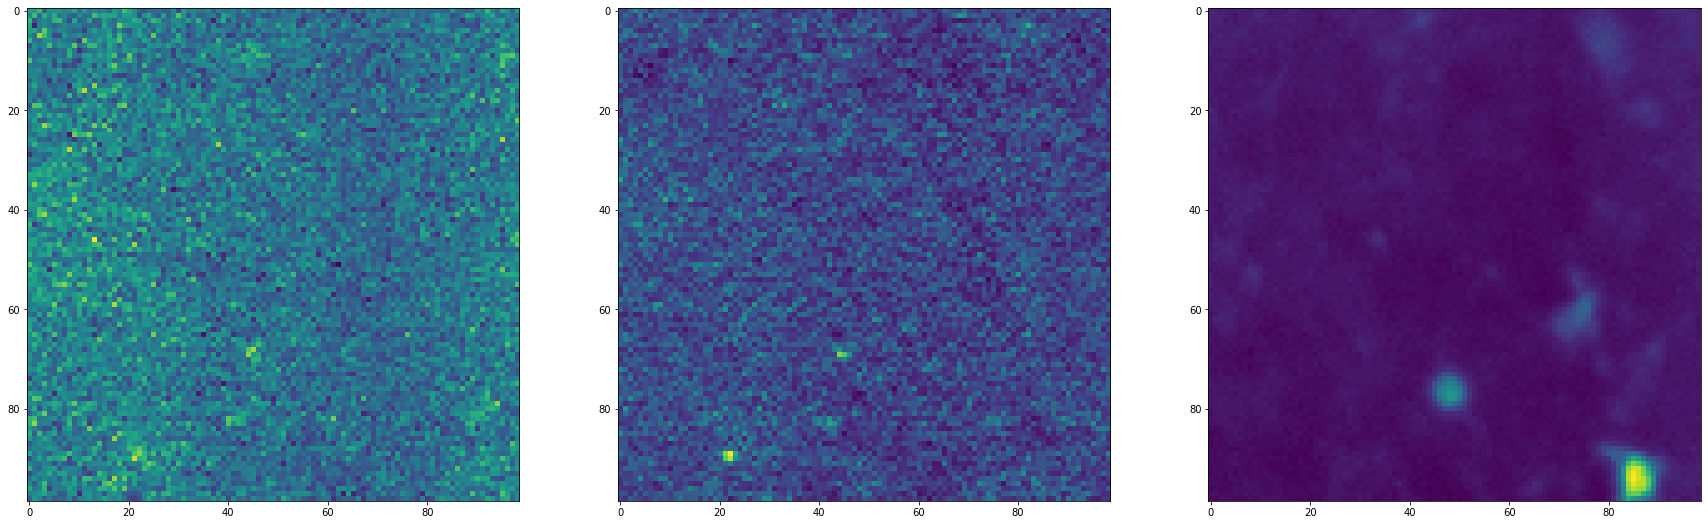

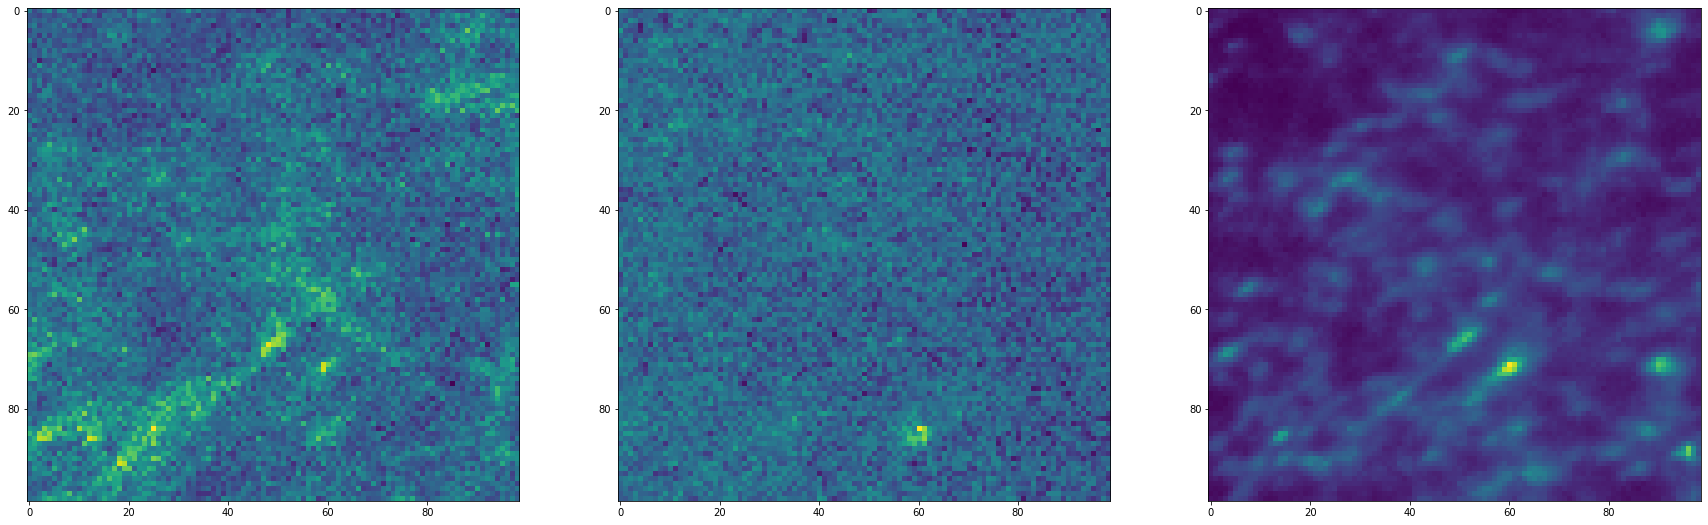

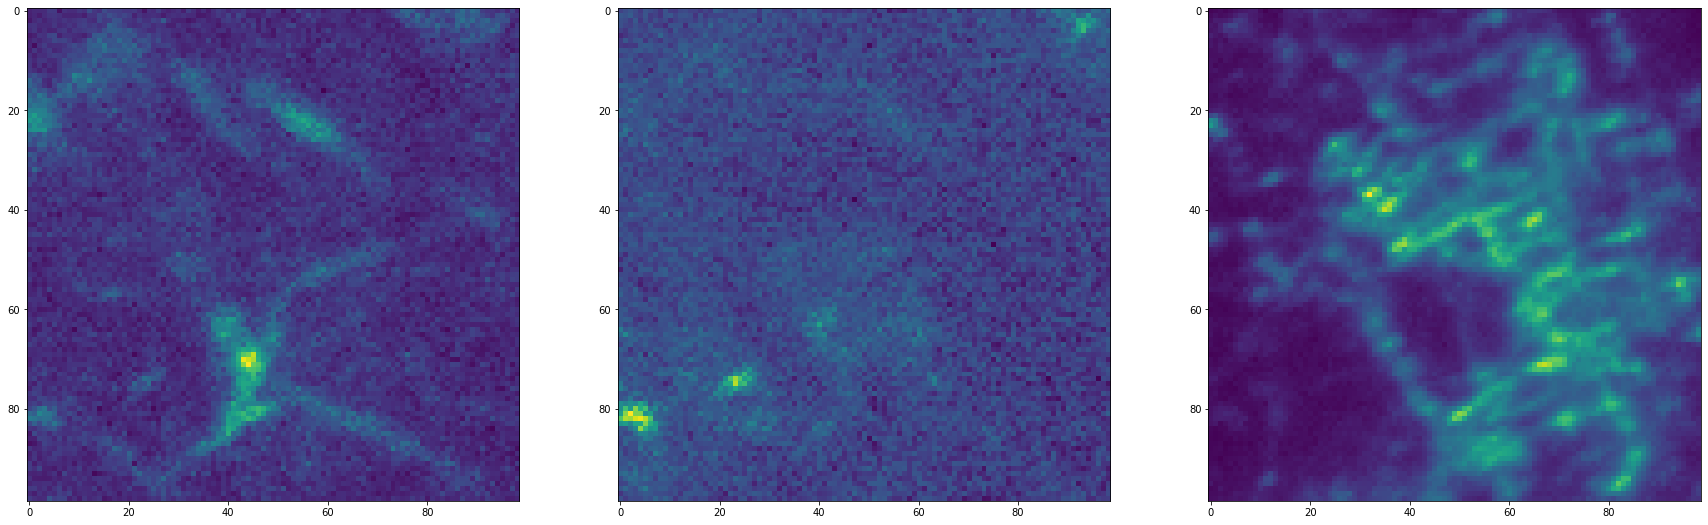

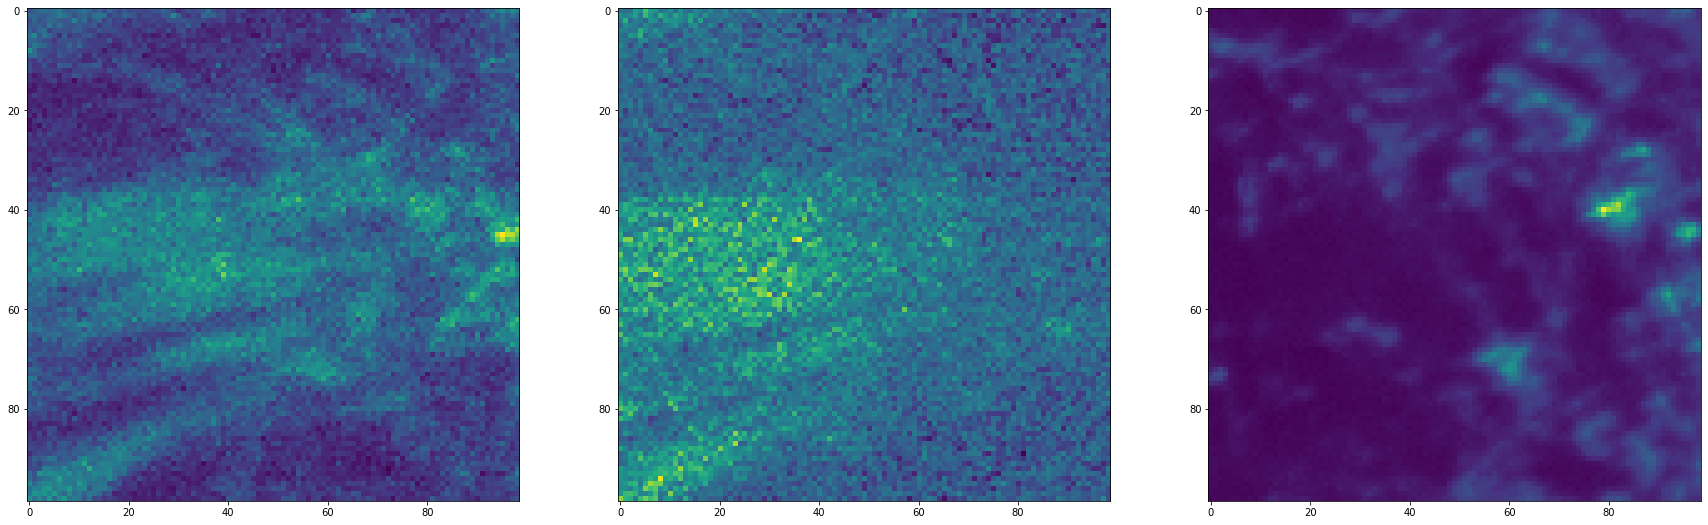

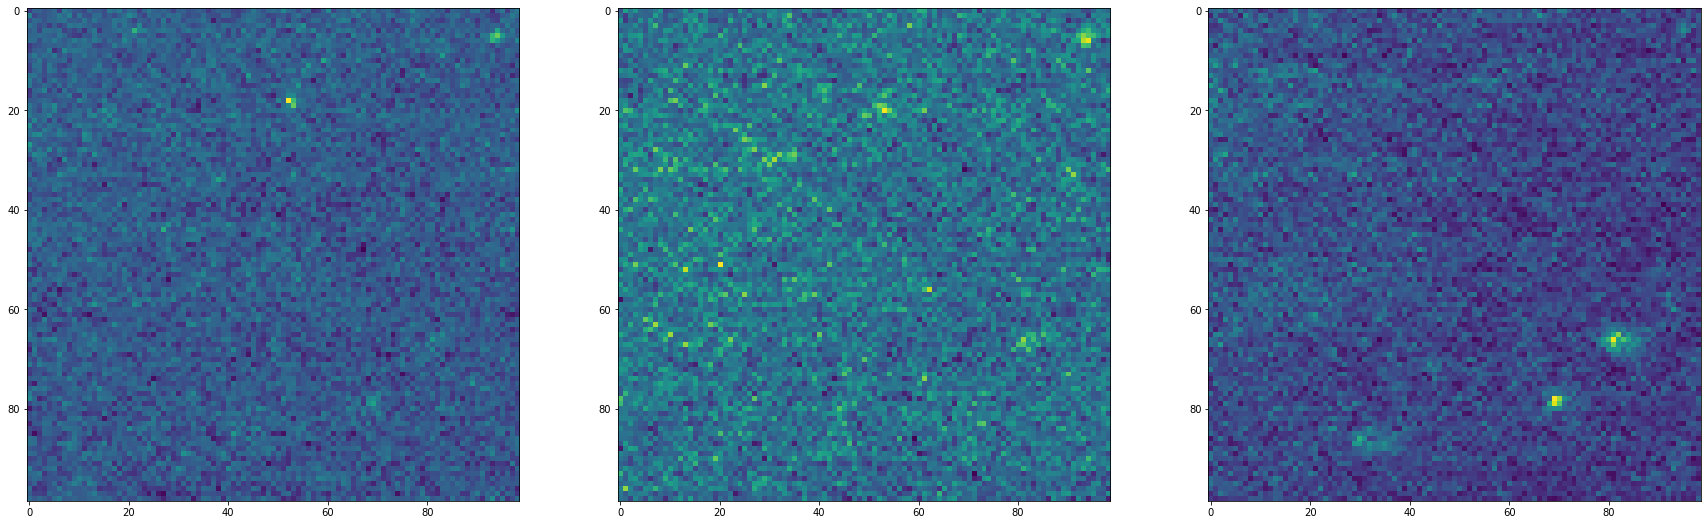

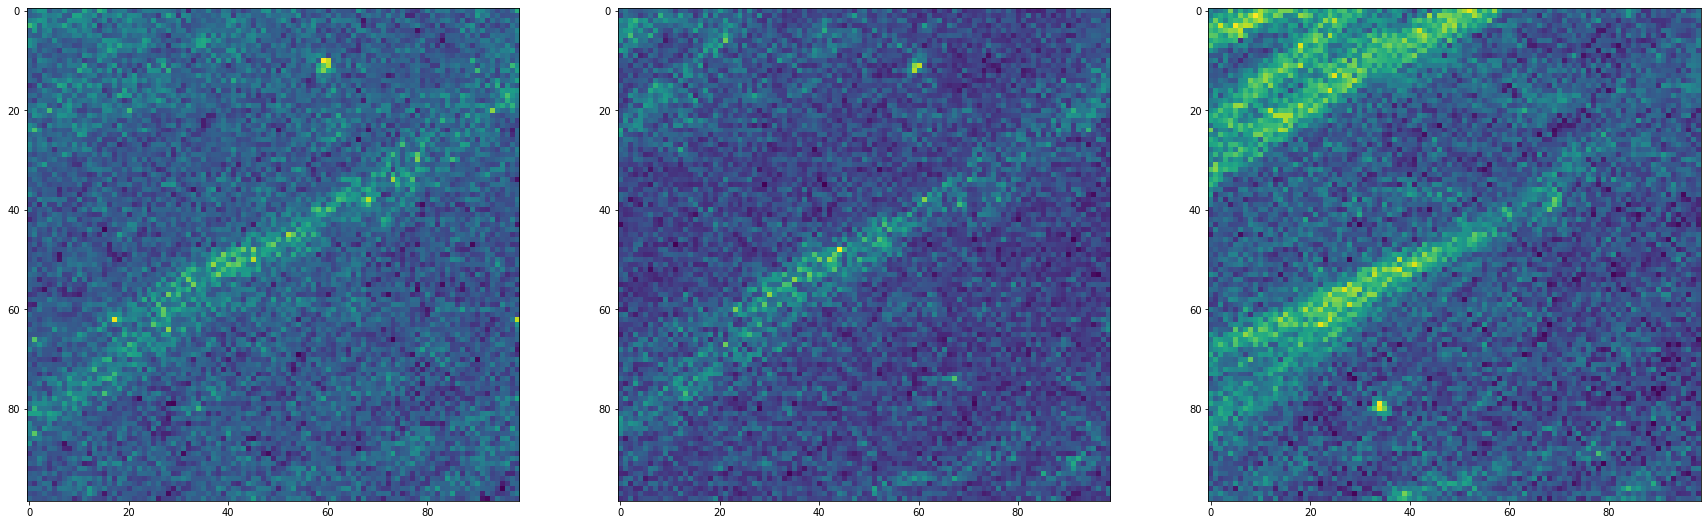

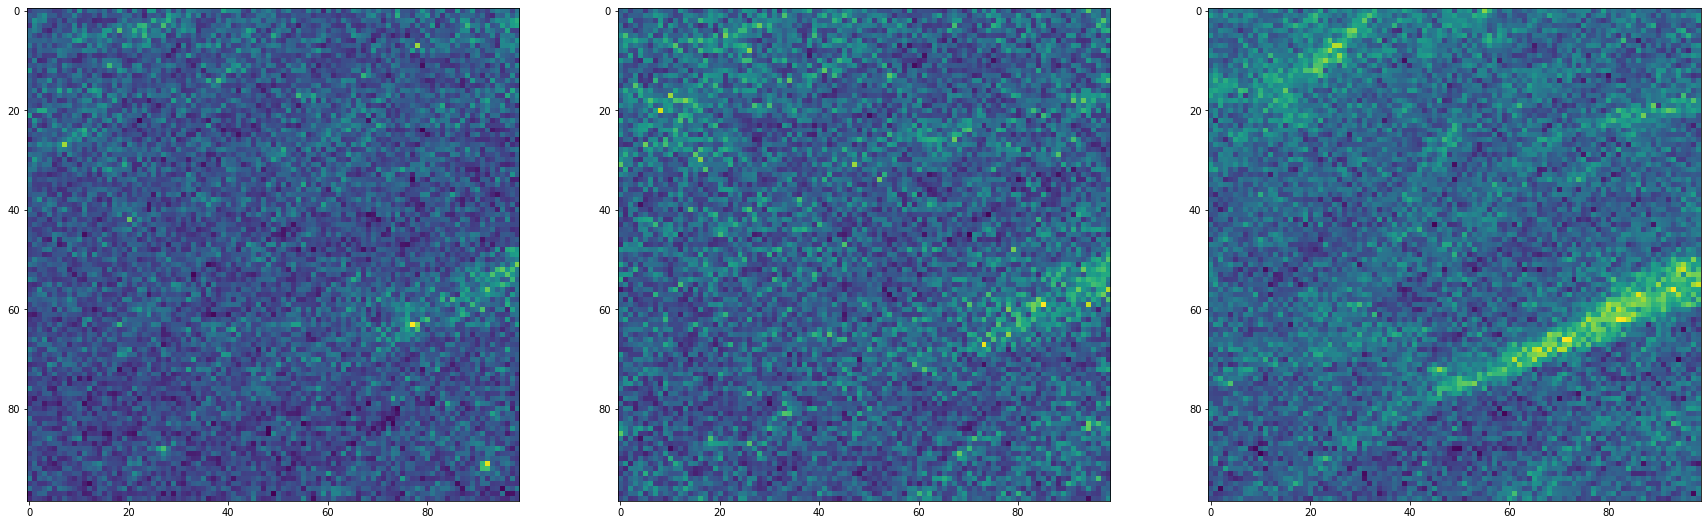

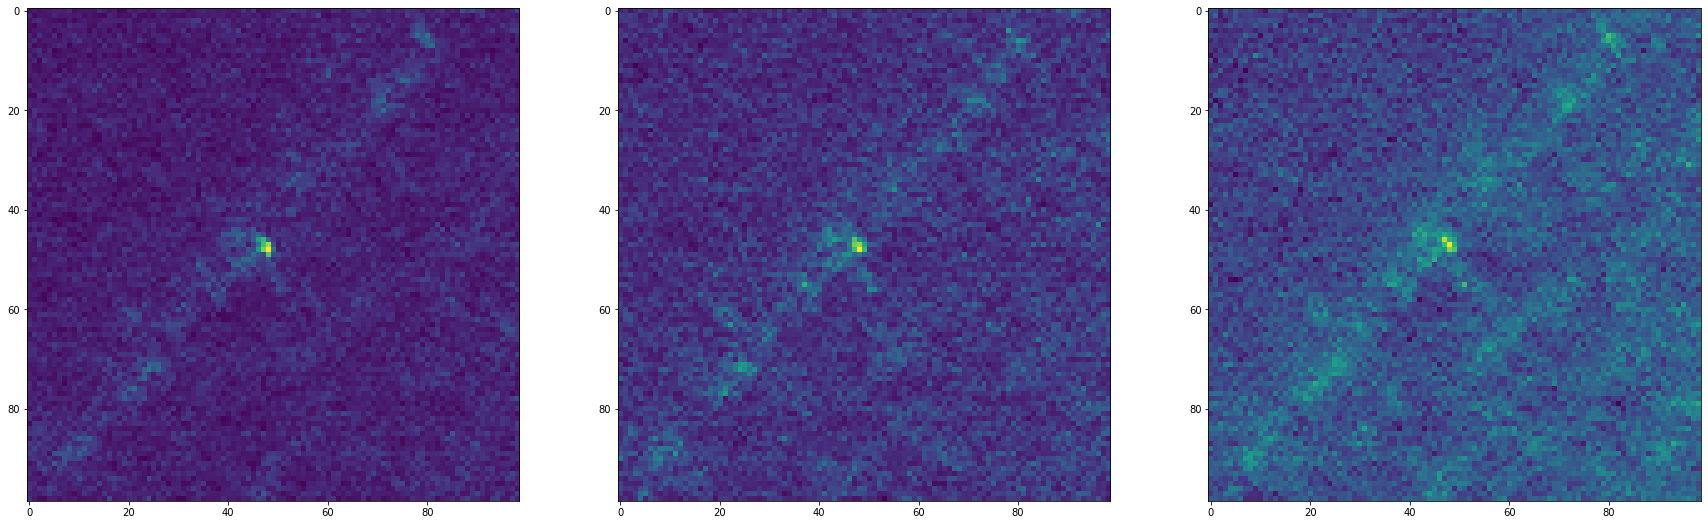

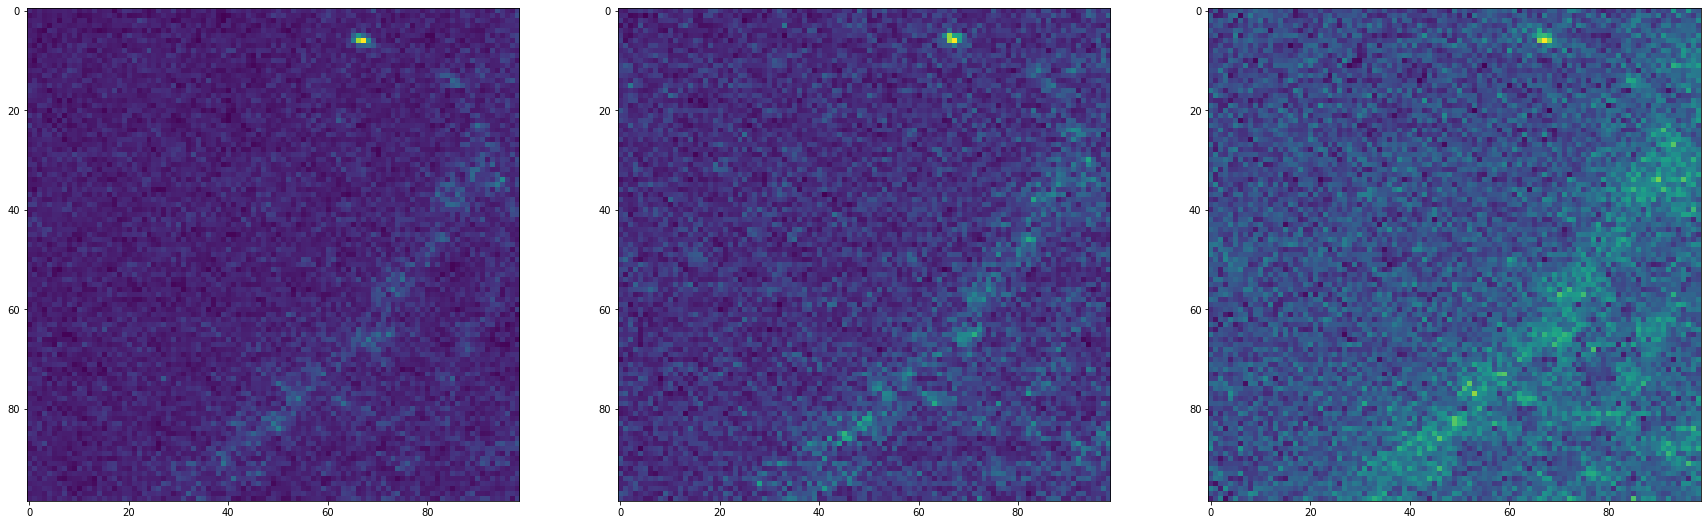

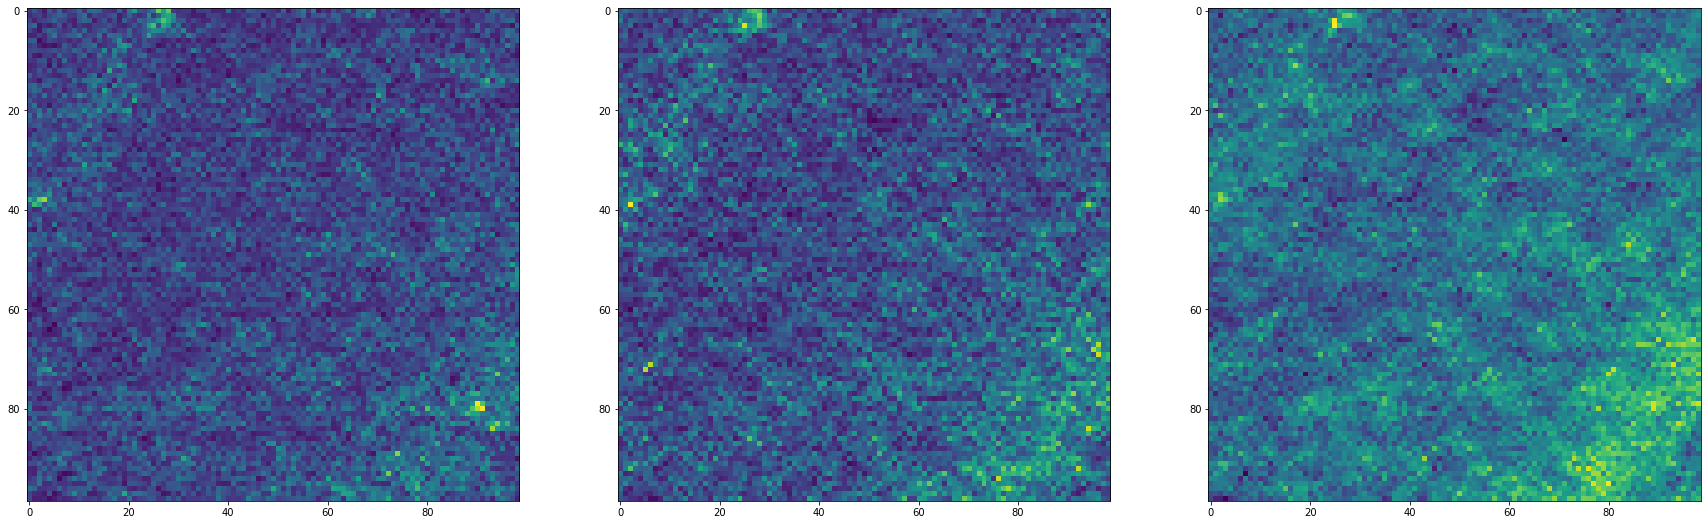

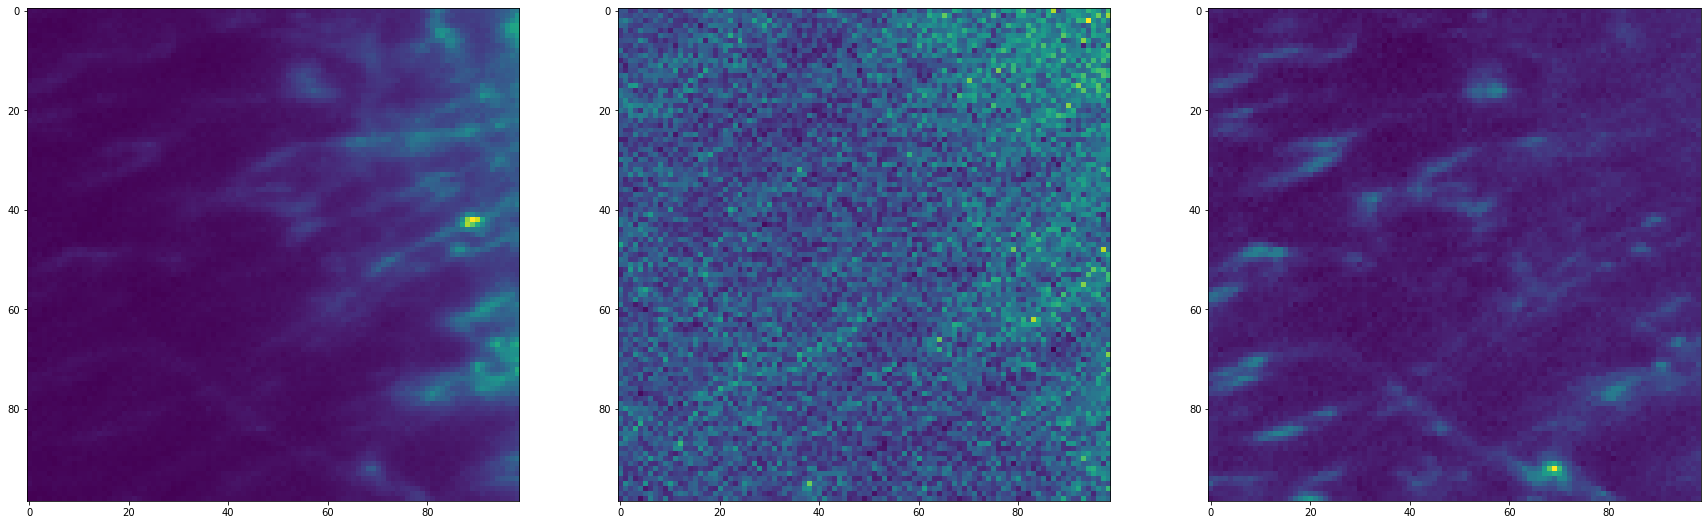

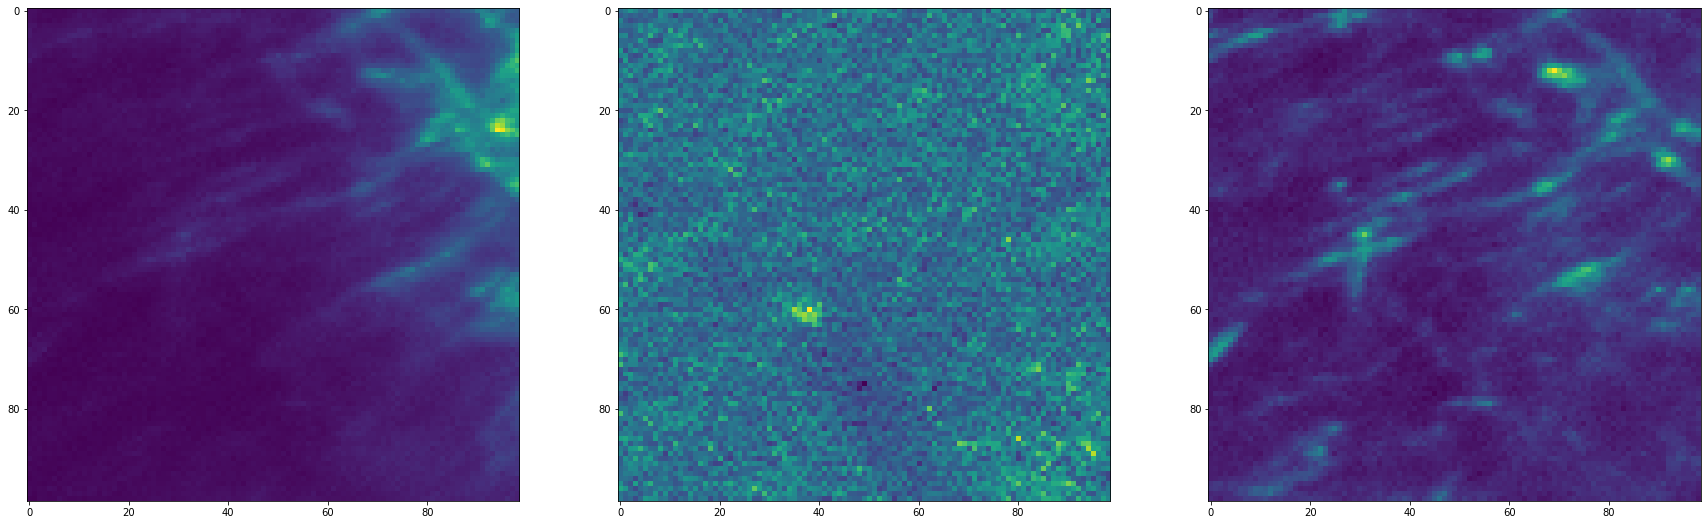

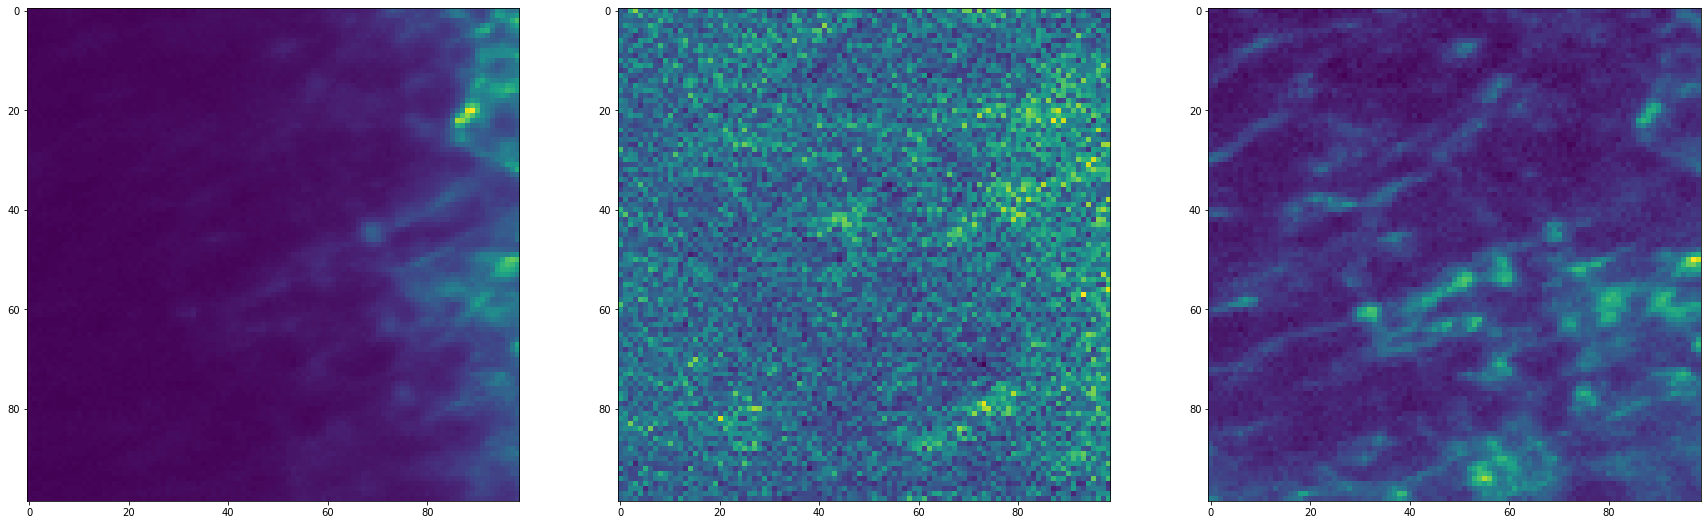

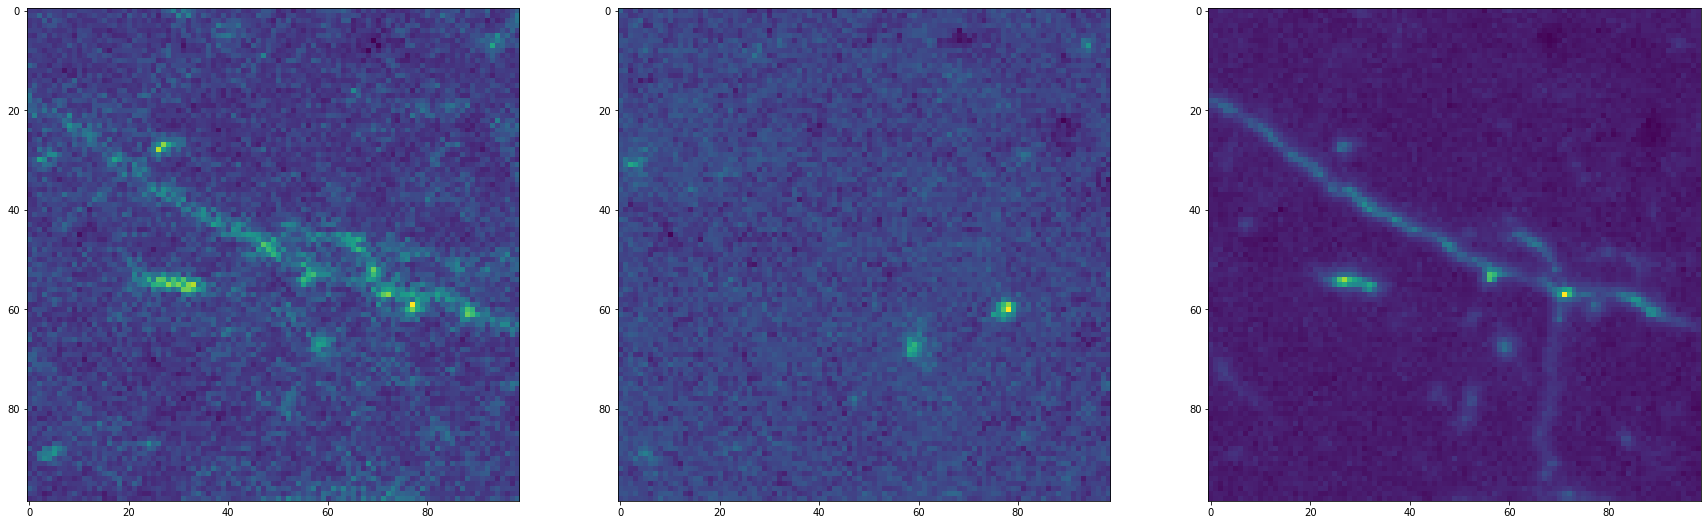

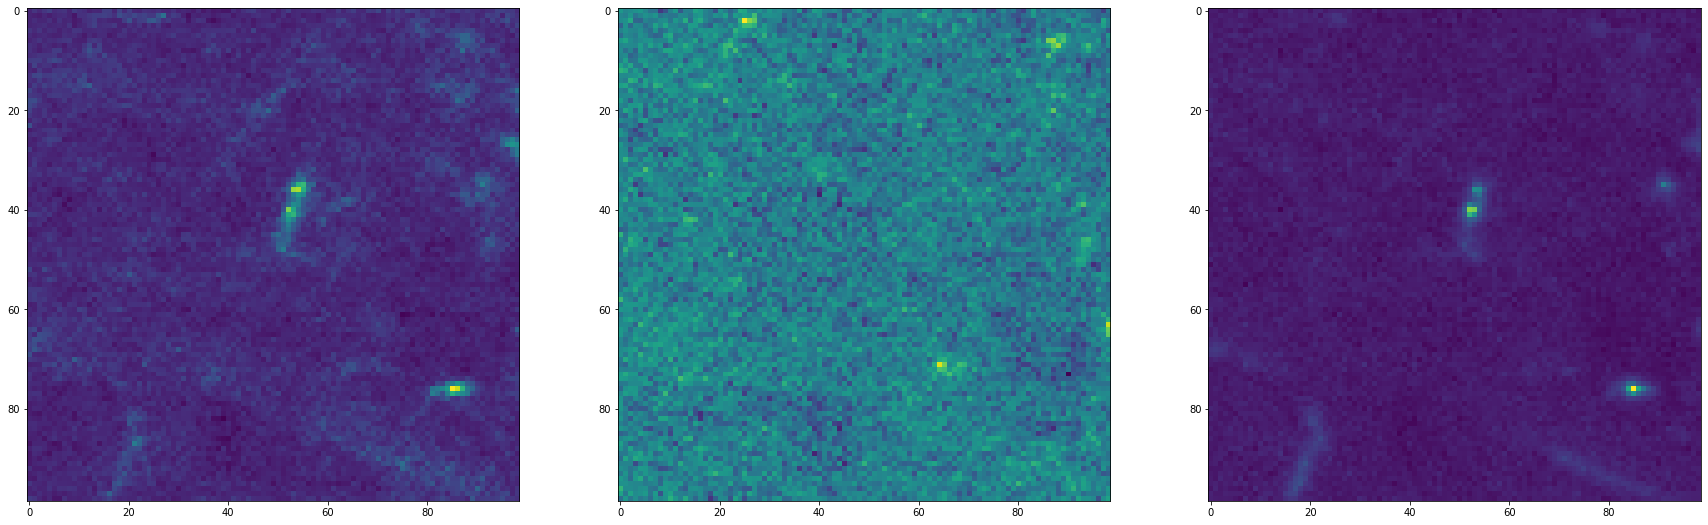

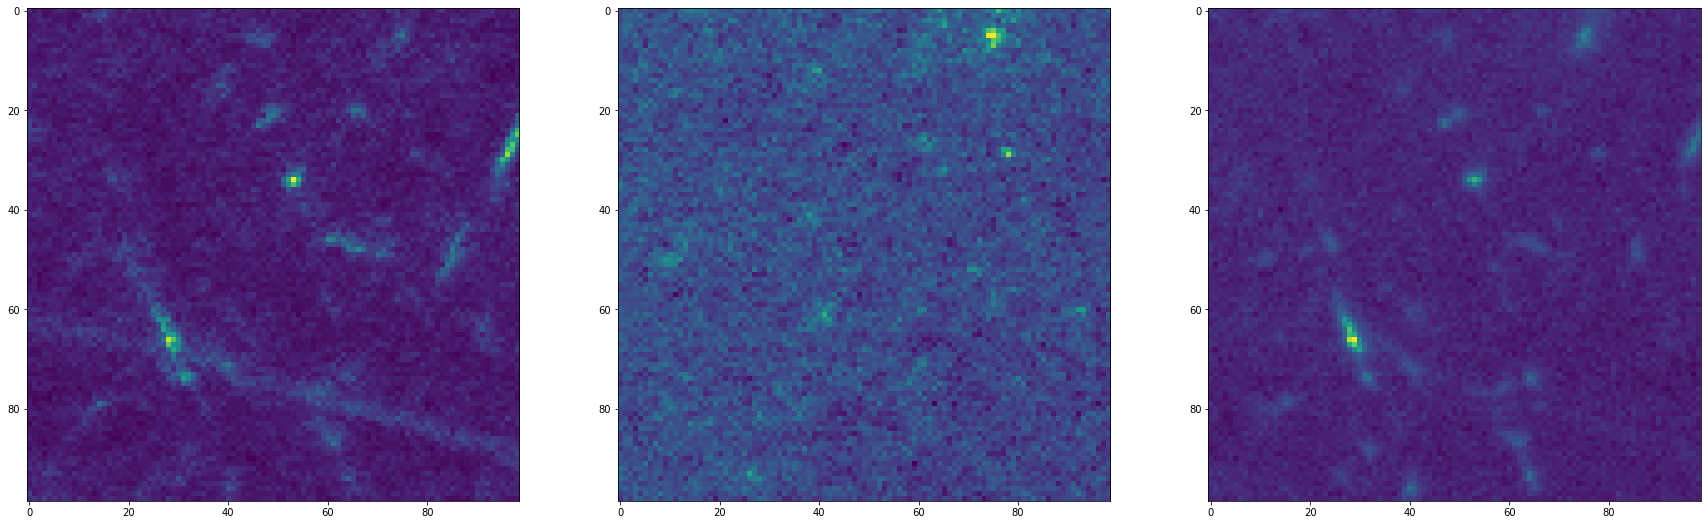

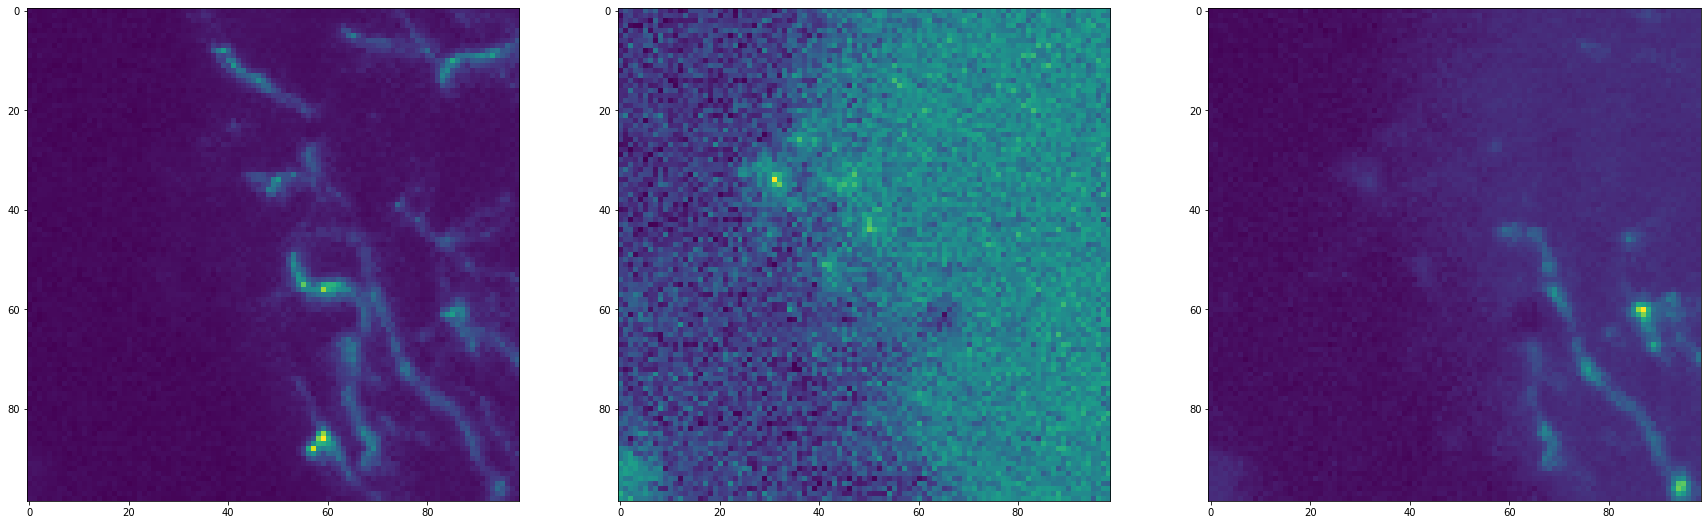

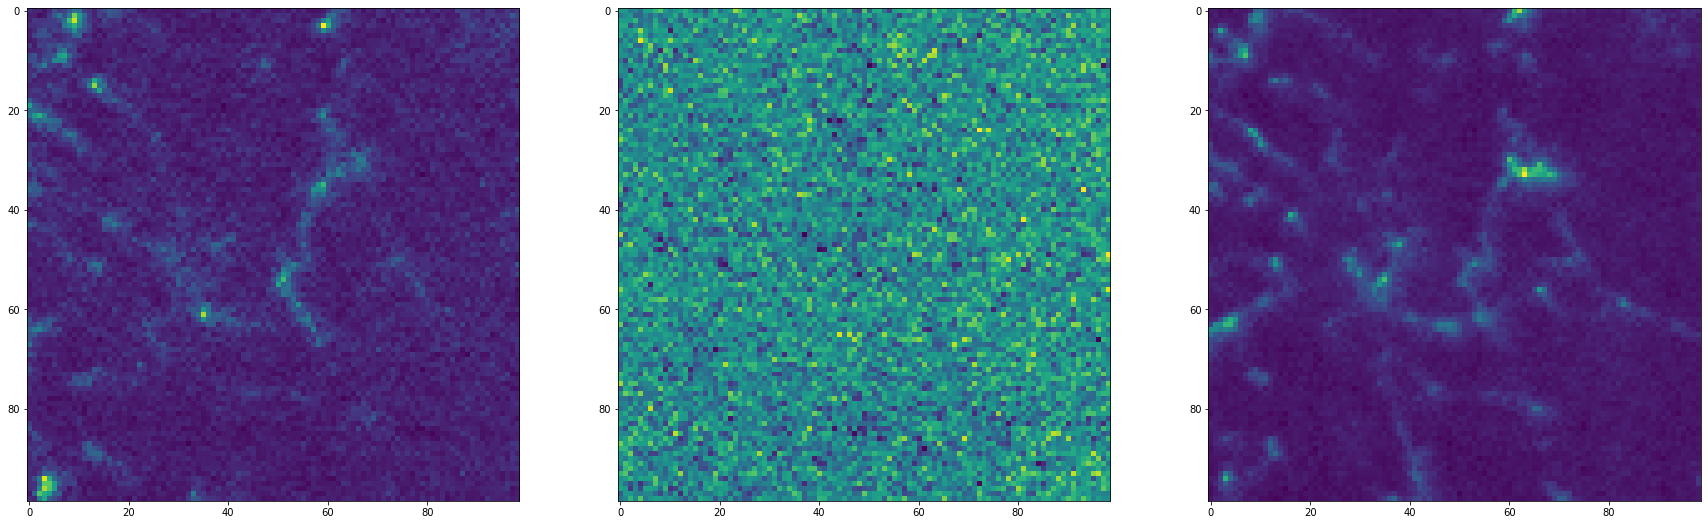

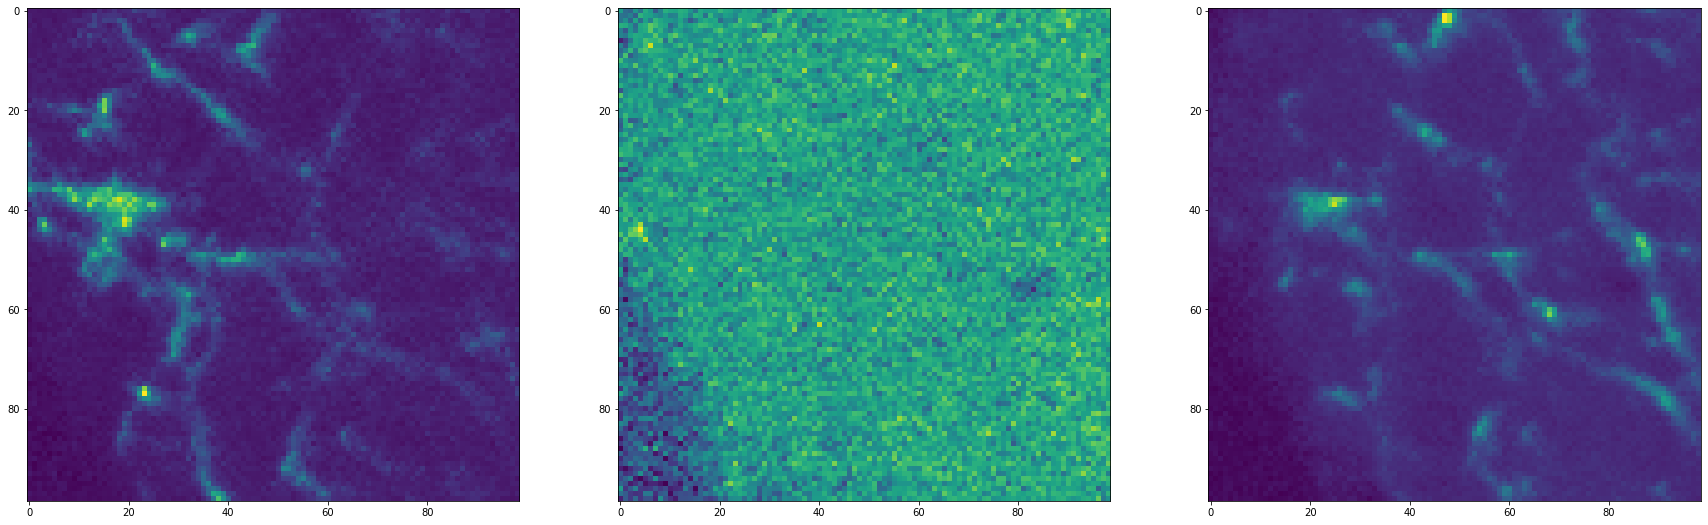

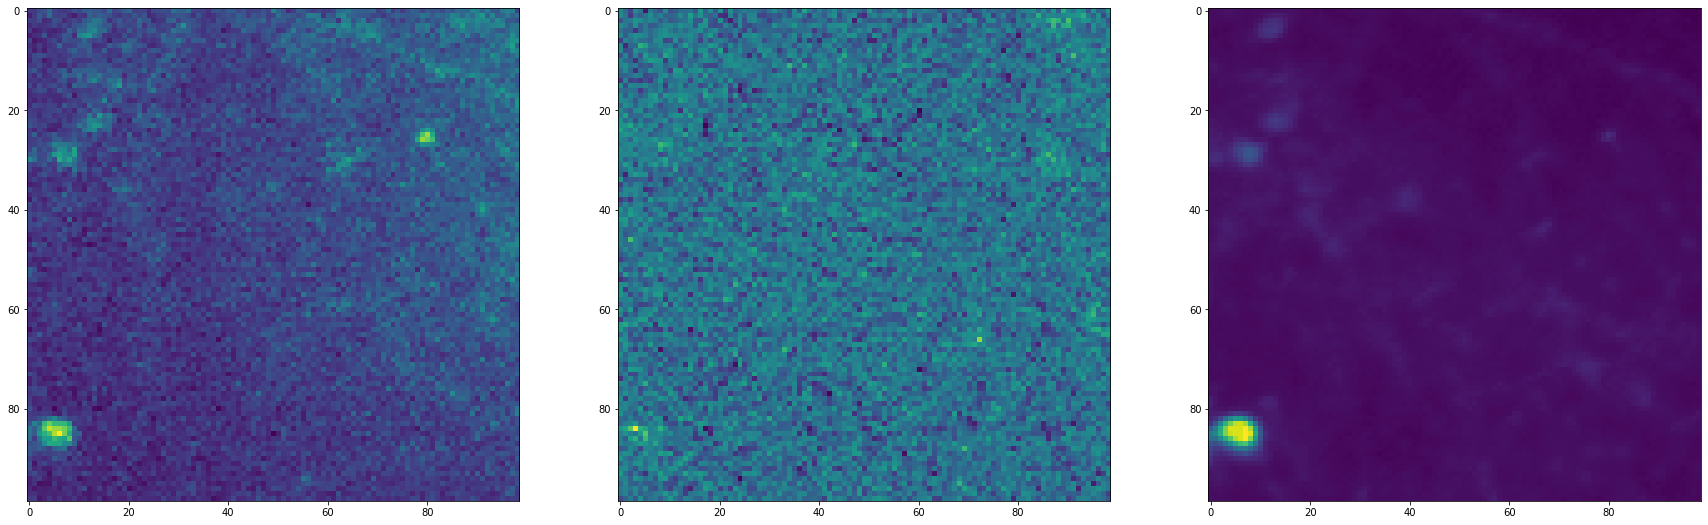

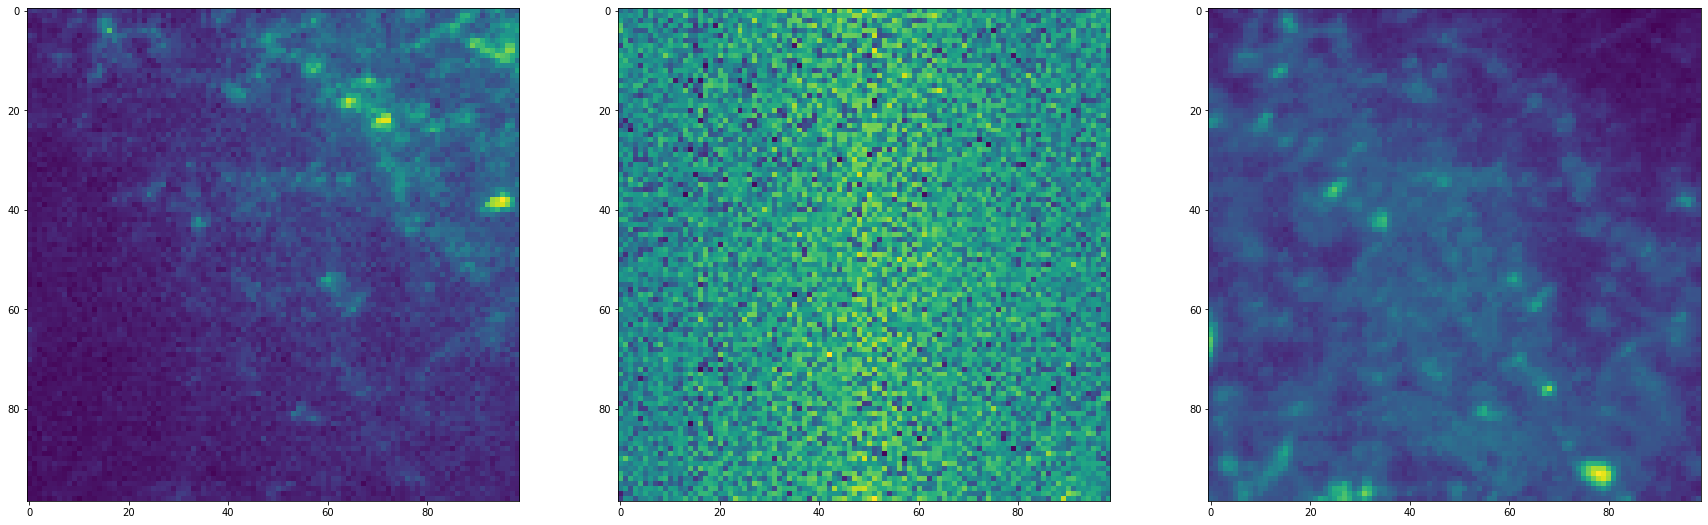

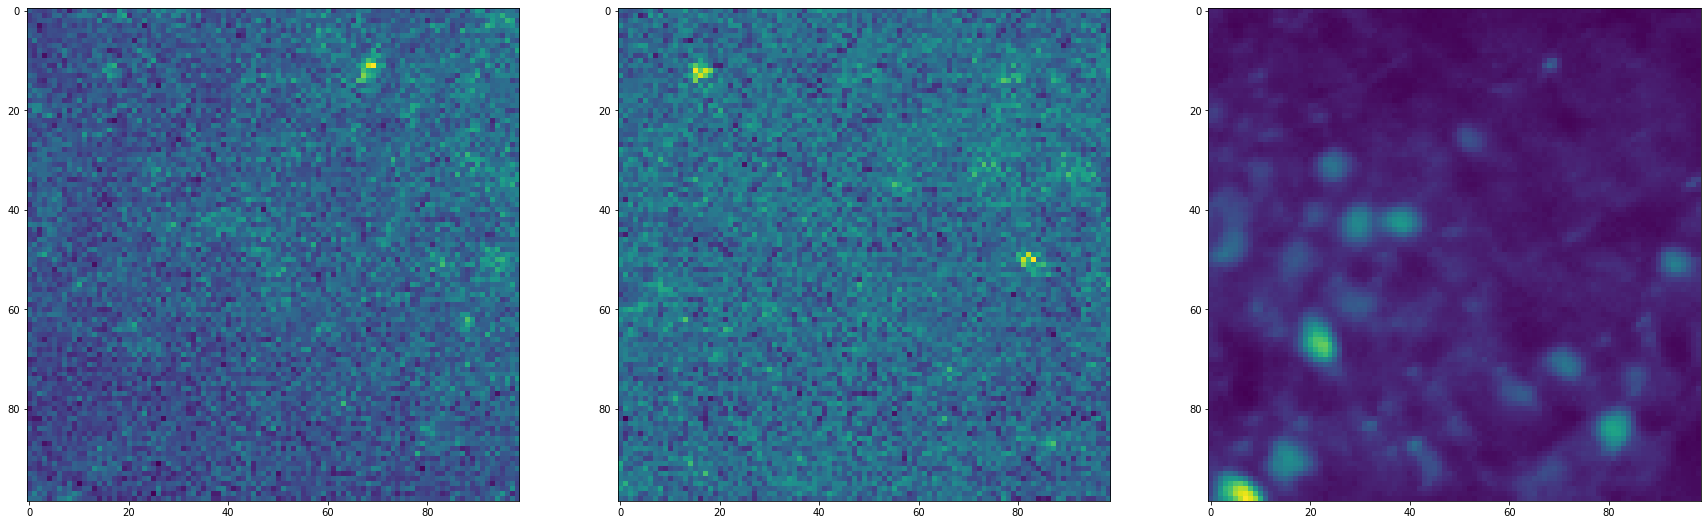

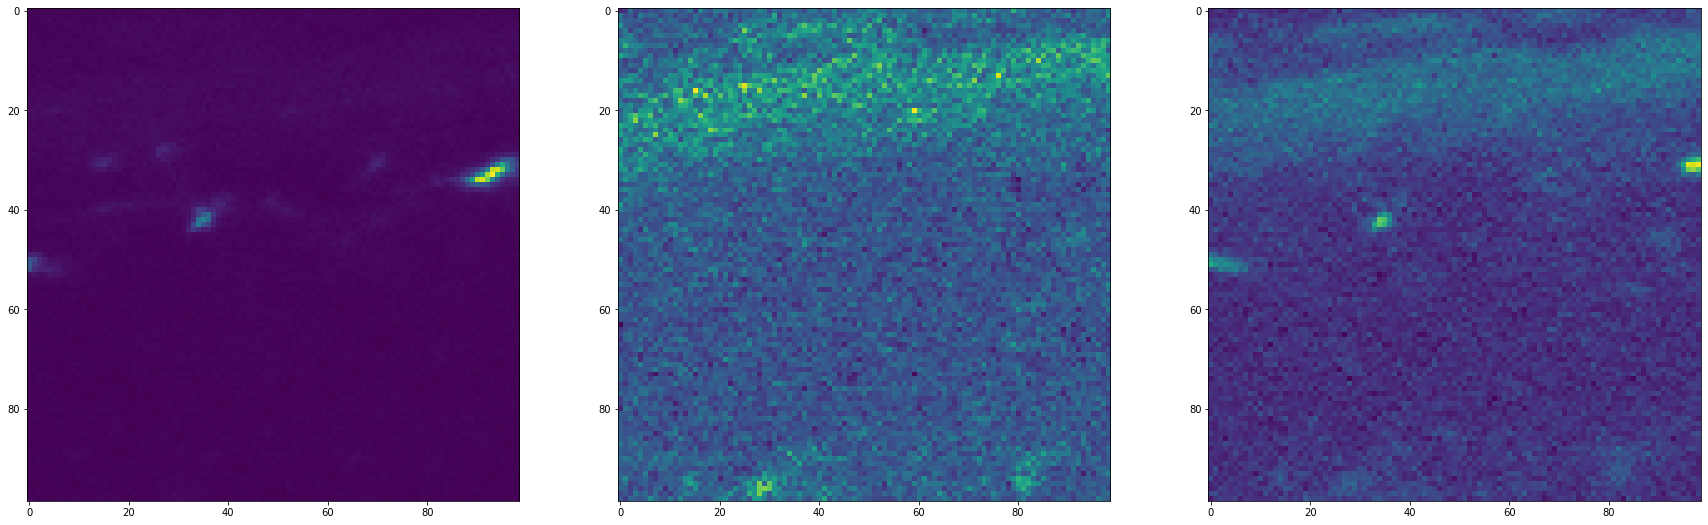

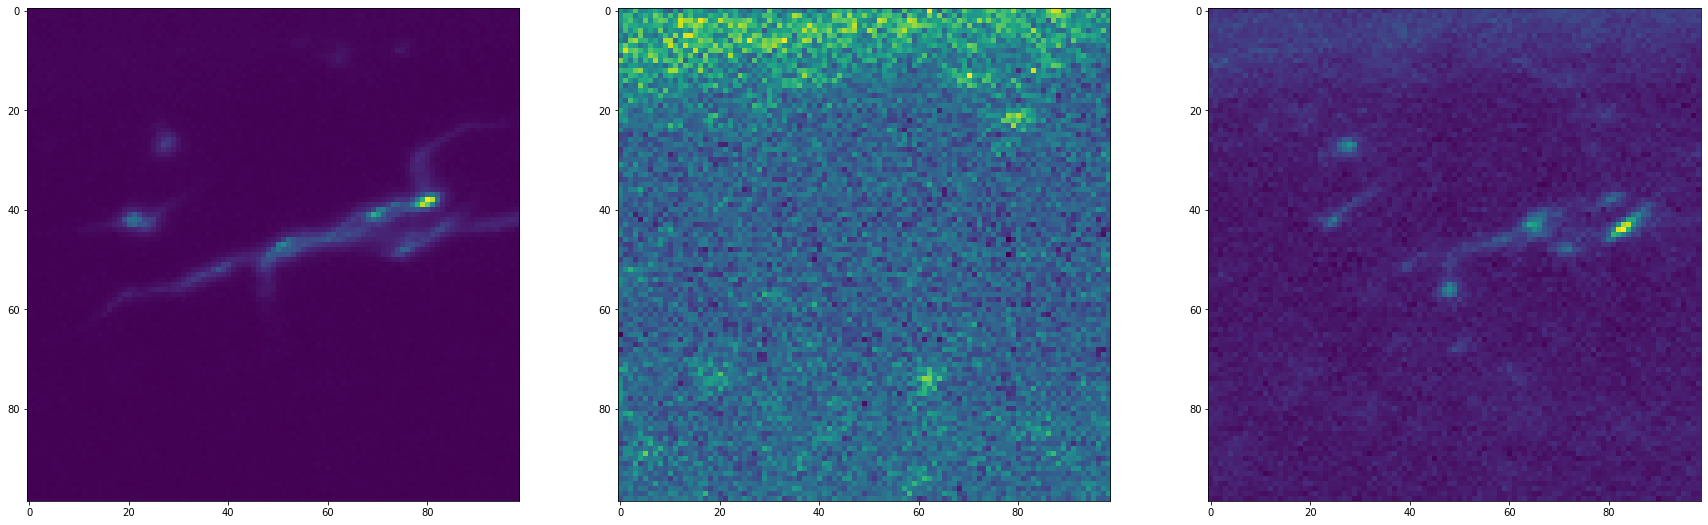

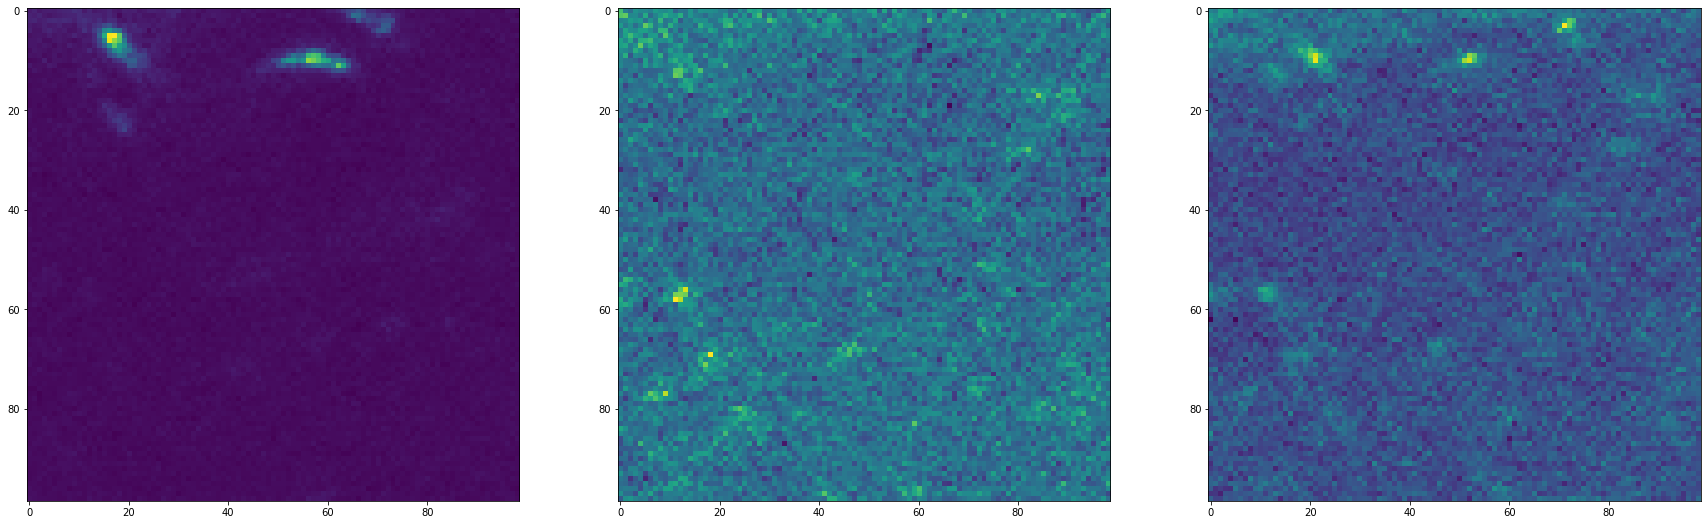

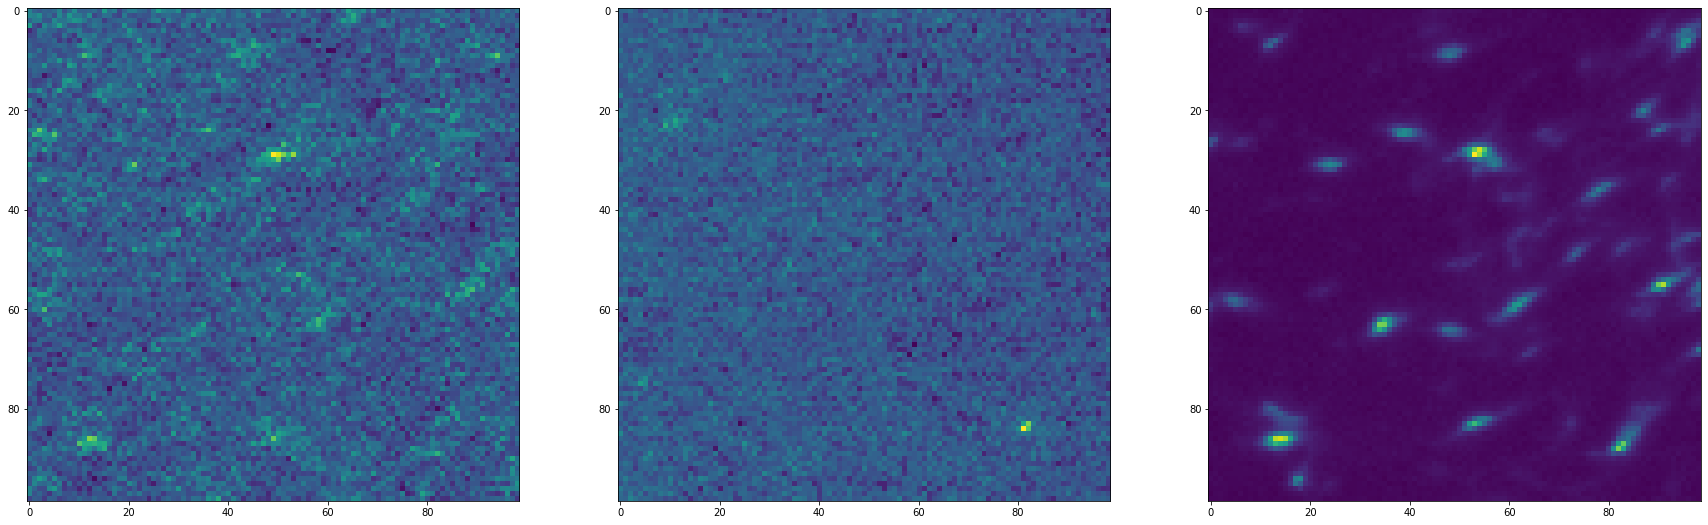

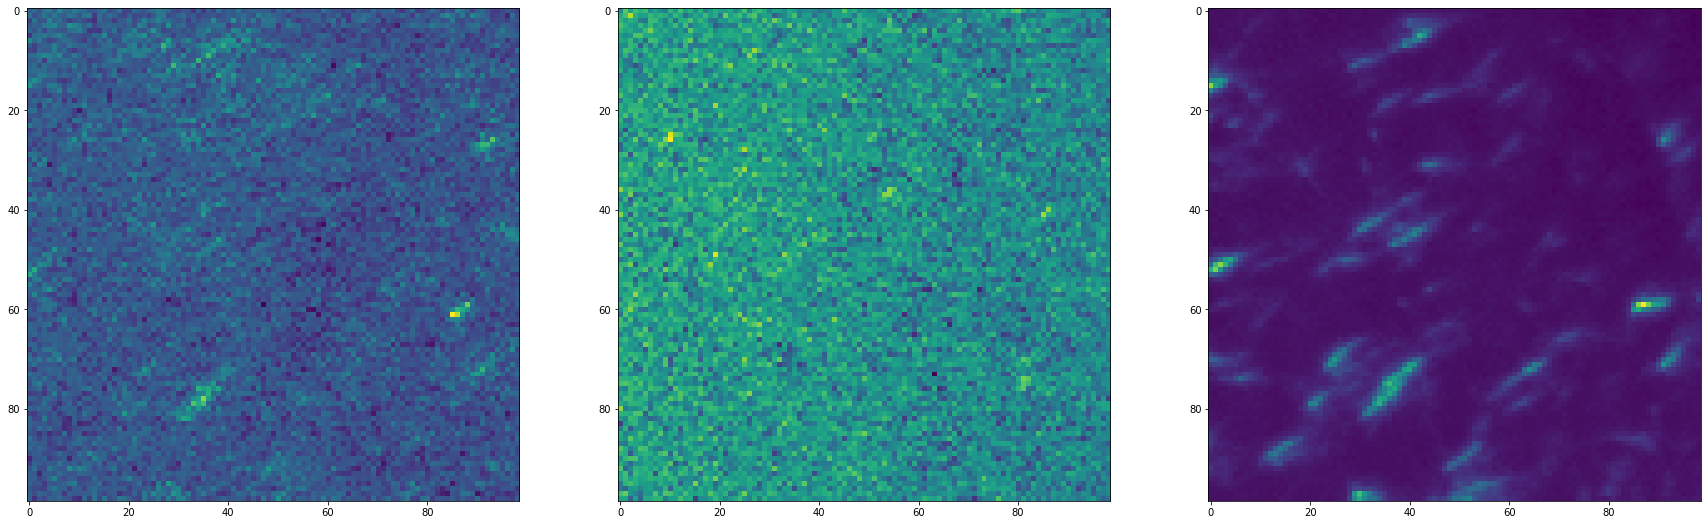

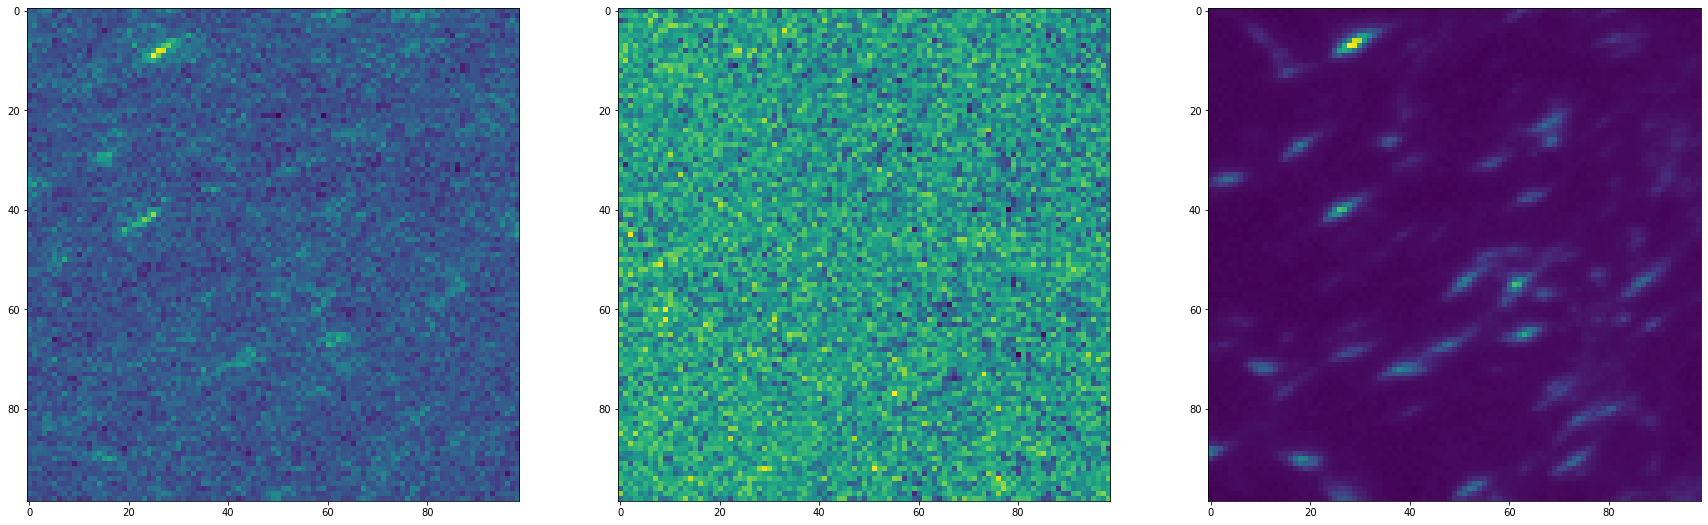

In [20]:
from brainlit.BrainLine.util import _find_sample_names
import h5py
import time
from random import shuffle

laps = []

prev_time = time.time()
files = _find_sample_names("/Users/thomasathey/Documents/mimlab/mouselight/ailey/detection_axon/brainMS29/val/", add_dir=True)
files = [f for f in files if "2334_4047" not in f]
shuffle(files)
zs = [0, 50, 98]

for filename in files:
    f = h5py.File(filename, "r")
    im = f.get("image_3channel")
    shuffle(zs)
    for z in zs:
        slice = im[:,:,:,z]
        fig, axs = plt.subplots(1,3)
        fig.set_figheight(10)
        fig.set_figwidth(30)
        axs[0].imshow(slice[0,:,:])
        axs[1].imshow(slice[1,:,:])
        axs[2].imshow(slice[2,:,:])
        plt.show()
        q = input("axon?")

        if q in ["y", "n"]:
            pass
        else:
            raise ValueError(f"invalid input: {q}")
        
    next_time = time.time()
    laps.append(next_time - prev_time)
    prev_time = next_time
    

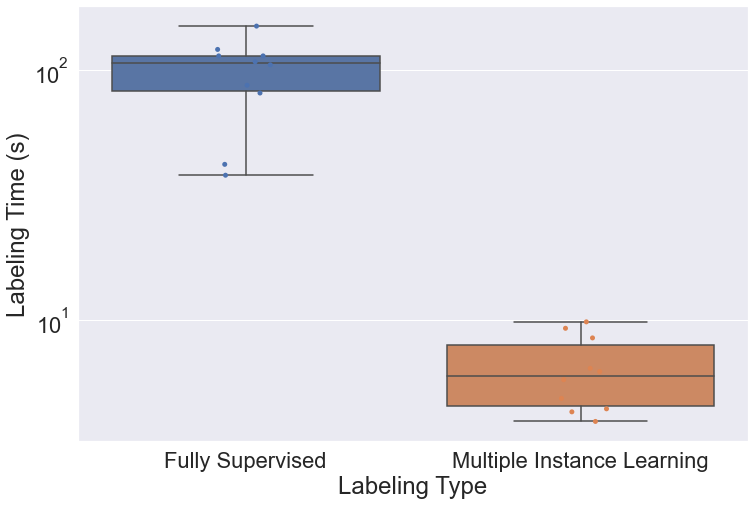

In [33]:

labeling_times = [114, 108, 38, 114, 105, 150, 81, 87, 121, 42]
labeling_types = ["Fully Supervised" for i in labeling_times]
mil_times = [9.283069849014282,
 6.232702970504761,
 6.418781042098999,
 5.783848762512207,
 3.9372591972351074,
 4.867592096328735,
 4.300980091094971,
 9.848776817321777,
 8.496260166168213,
 4.422609806060791]
labeling_type_mil = ["Multiple Instance Learning" for i in mil_times]

labeling_times = labeling_times + mil_times
labeling_types = labeling_types + labeling_type_mil


data = {"Labeling Time (s)" : labeling_times, "Labeling Type": labeling_types}
df = pd.DataFrame(data=data)
sns.set(font_scale=2)
sns.stripplot(x="Labeling Type", y="Labeling Time (s)", data=df)
sns.boxplot(x="Labeling Type", y="Labeling Time (s)", data=df)
plt.gca().set_yscale('log')
fig = plt.gcf()
fig.set_figheight(8)
fig.set_figwidth(12)
